# ROMY - Barometer

In [2]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroseis import baroseis

In [39]:
# load config
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240315_file.yaml")
config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240324_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240423_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240829_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240316_file.yaml") # jump


In [40]:
# Initialize baroseis object
bs = baroseis(conf=config)

# Load data specified in config
bs.load_data()

Creating new Hilbert transform data...
 -> No resampling required!

>Runtime: 0.0 minutes



In [41]:

# Can also override time window
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

# bs.load_data(
#     tbeg="2024-04-23 02:00",
#     tend="2024-04-23 05:00",
# )

# good event
# bs.load_data(
    # tbeg="2024-03-15 15:00",
    # tend="2024-03-15 18:00",
# )

# good event
# bs.load_data(
#     tbeg="2024-03-24 15:00",
#     tend="2024-03-24 17:00",
# )

# bad event
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

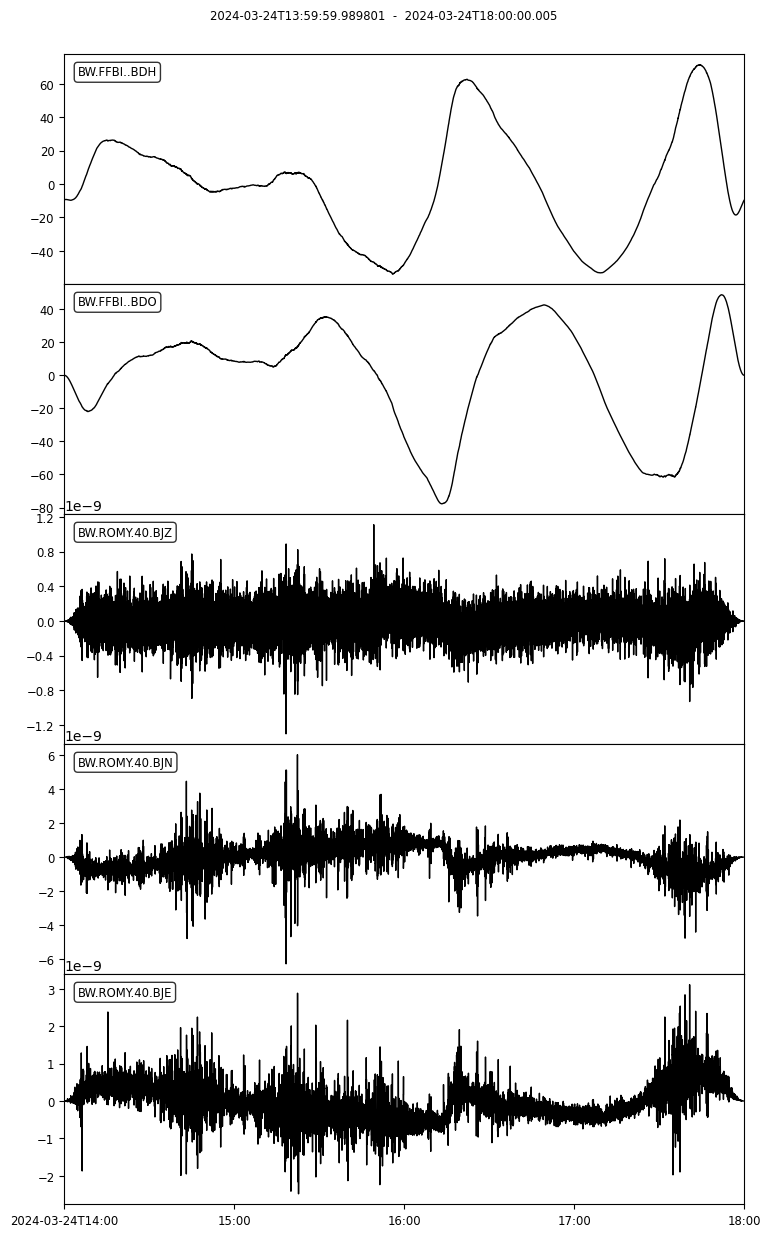

In [42]:
bs.st.plot(equal_scale=False);

In [43]:
# band pass filer
fmin = 0.0005
fmax = 0.02 
bs.filter_data(fmin=fmin, fmax=fmax)

# detrend
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.1)


Removing mean and trend...
Applying bandpass filter: 0.0005-0.02 Hz


5 Trace(s) in Stream:
BW.FFBI..BDO   | 2024-03-24T14:00:00.005000Z - 2024-03-24T18:00:00.005000Z | 1.0 Hz, 14401 samples
BW.ROMY.40.BJE | 2024-03-24T13:59:59.997801Z - 2024-03-24T17:59:59.997801Z | 1.0 Hz, 14401 samples
BW.ROMY.40.BJN | 2024-03-24T13:59:59.989801Z - 2024-03-24T17:59:59.989801Z | 1.0 Hz, 14401 samples
BW.ROMY.40.BJZ | 2024-03-24T14:00:00.004199Z - 2024-03-24T18:00:00.004199Z | 1.0 Hz, 14401 samples
BW.FFBI..BDH   | 2024-03-24T14:00:00.005000Z - 2024-03-24T18:00:00.005000Z | 1.0 Hz, 14401 samples

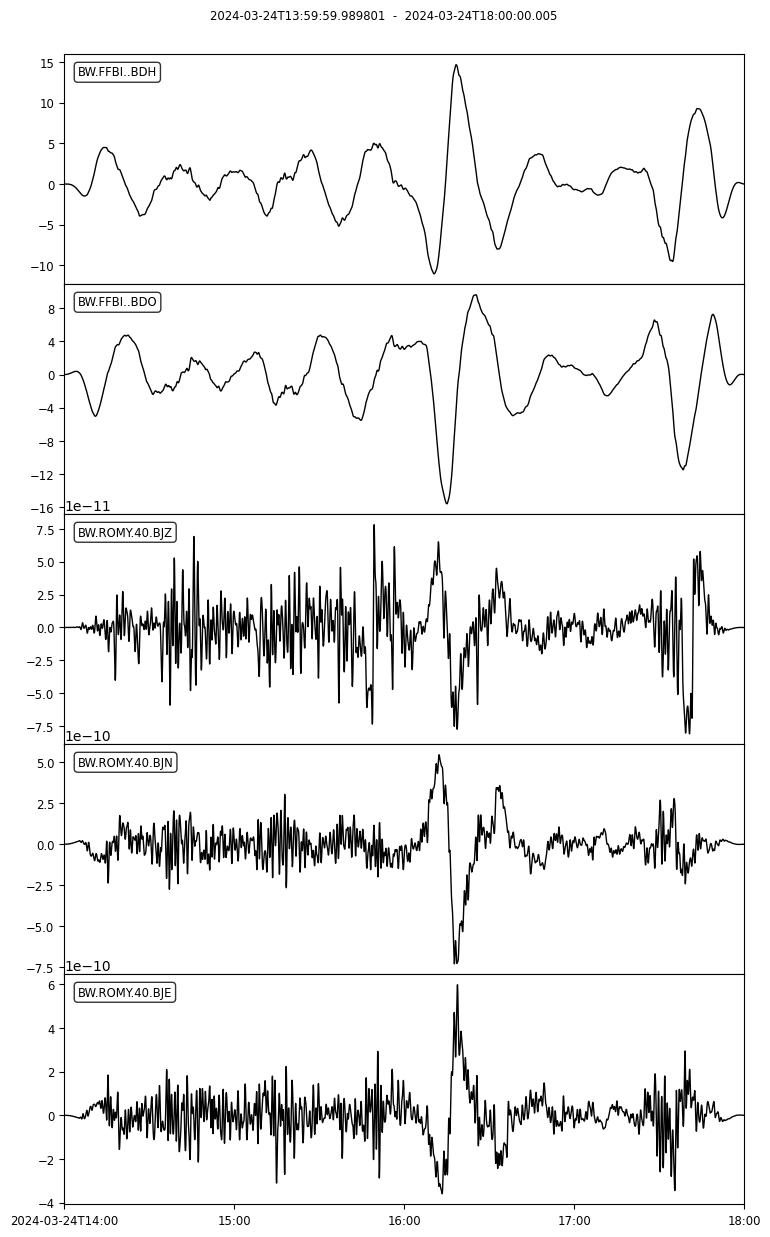

In [44]:
bs.st.plot(equal_scale=False);

 >Integrating ['JZ', 'JN', 'JE']


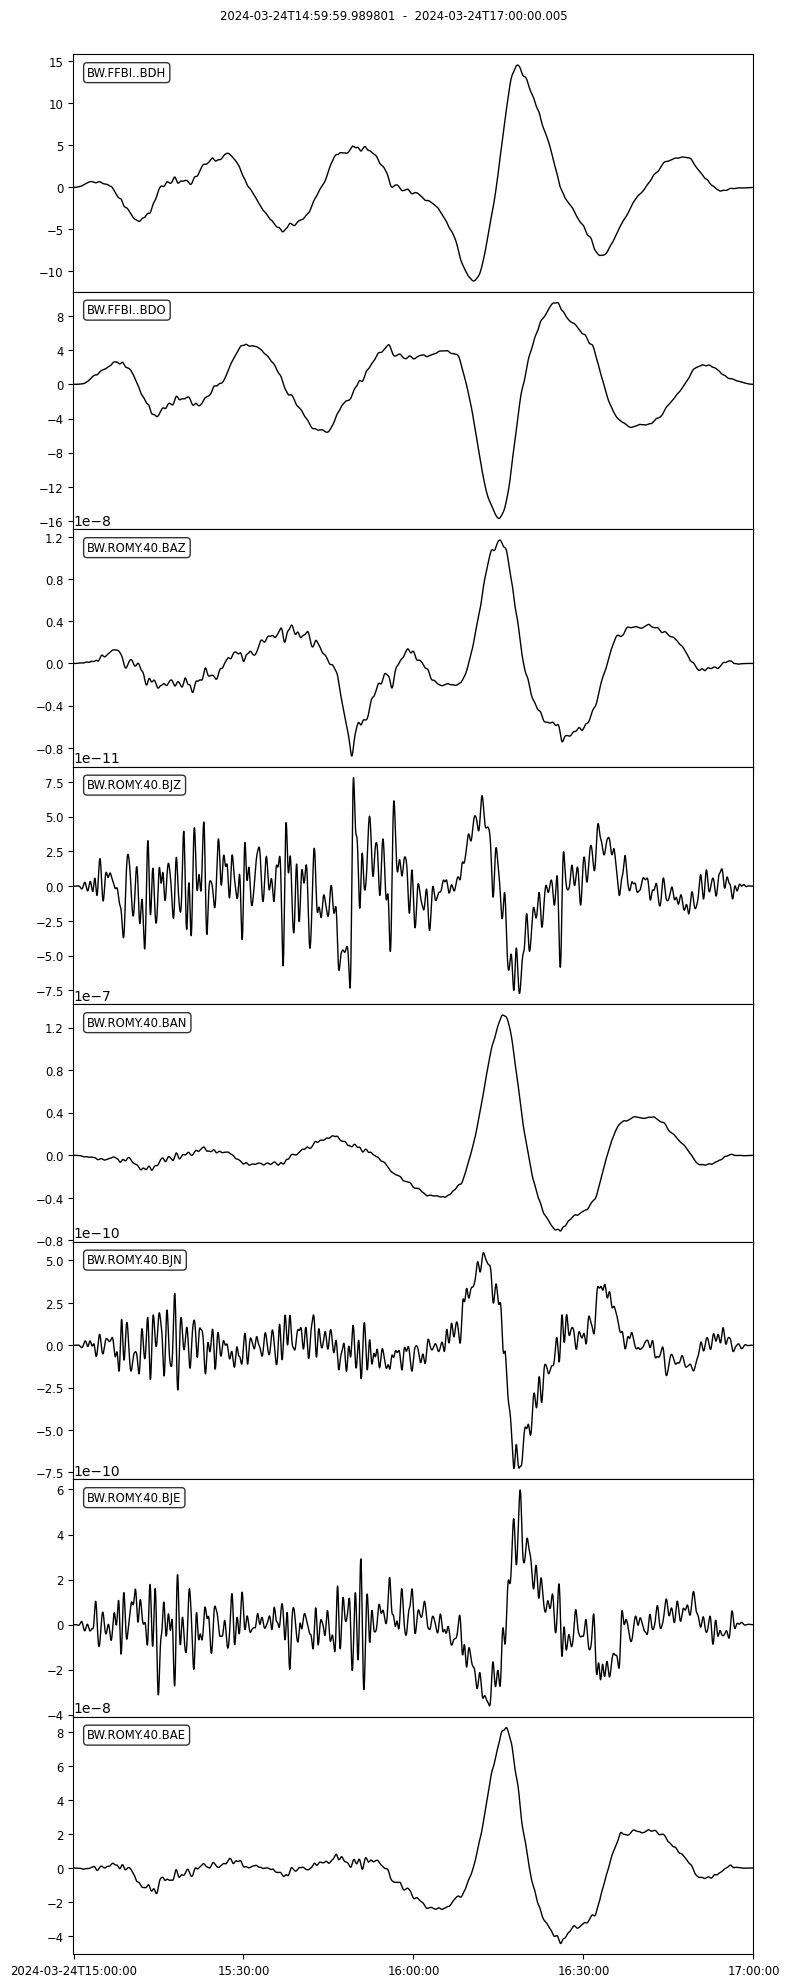

In [45]:

# integrate rotation to tilt
bs.integrate_data(method="cumtrapz") # method = "cumtrapz" or "spline"

# # trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# detrend waveforms
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.05)

# show new waveforms
bs.st.plot(equal_scale=False);


### Compuate and Compare Coherency

In [46]:
Twin = (bs.st[0].stats.npts / bs.st[0].stats.sampling_rate) // 2
overlap = 0.5
smooth_points = 31


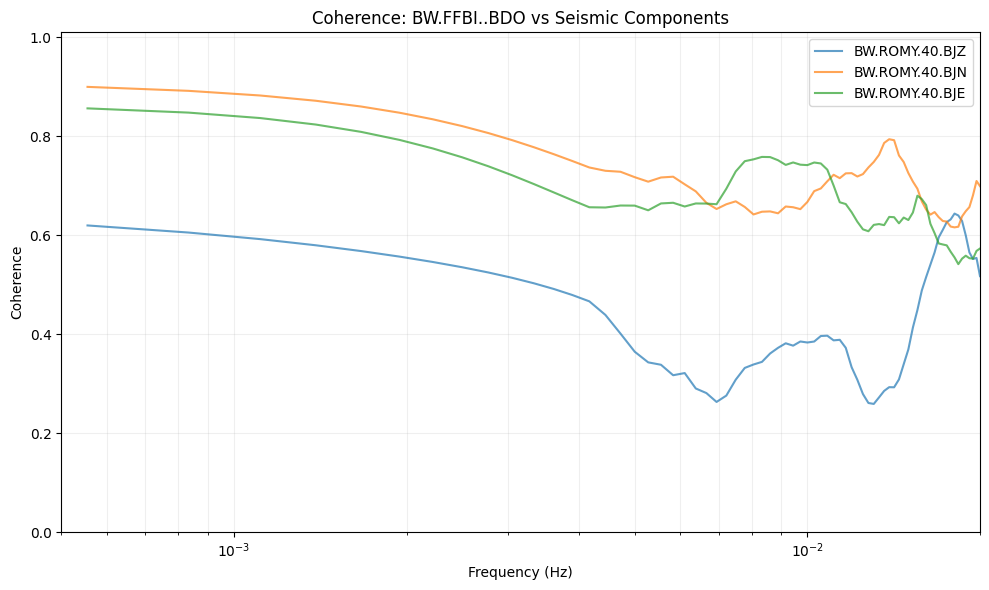

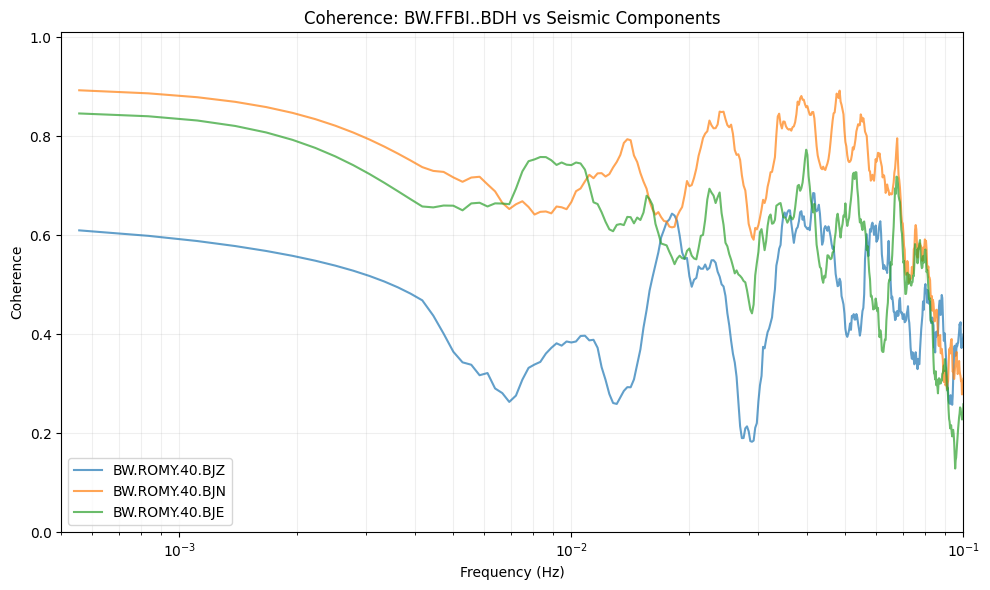

In [47]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BJZ", "BJN", "BJE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=fmin,
    fmax=fmax,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDH",
    channels=["BJZ", "BJN", "BJE"]

)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.0005,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


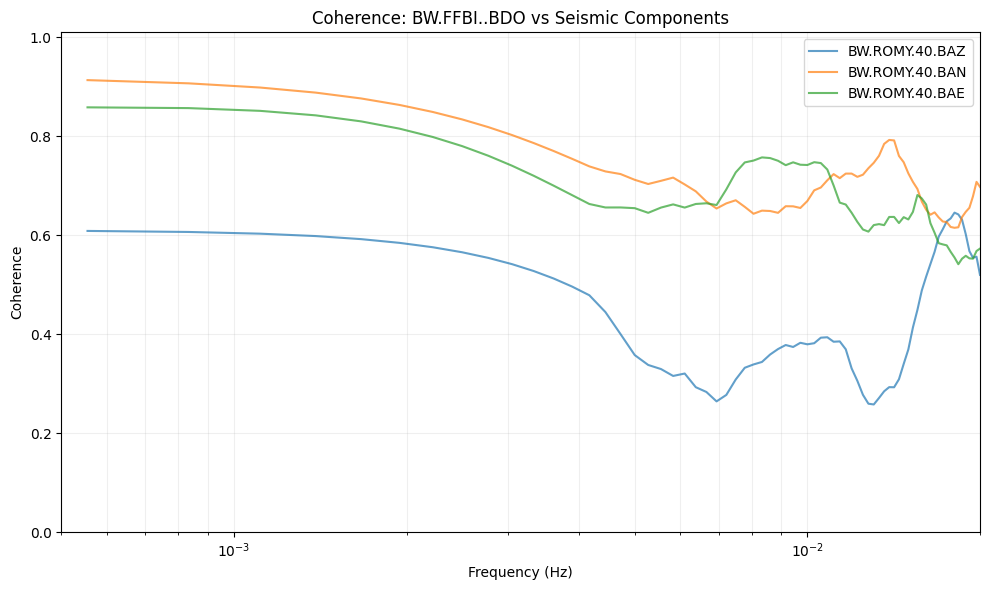

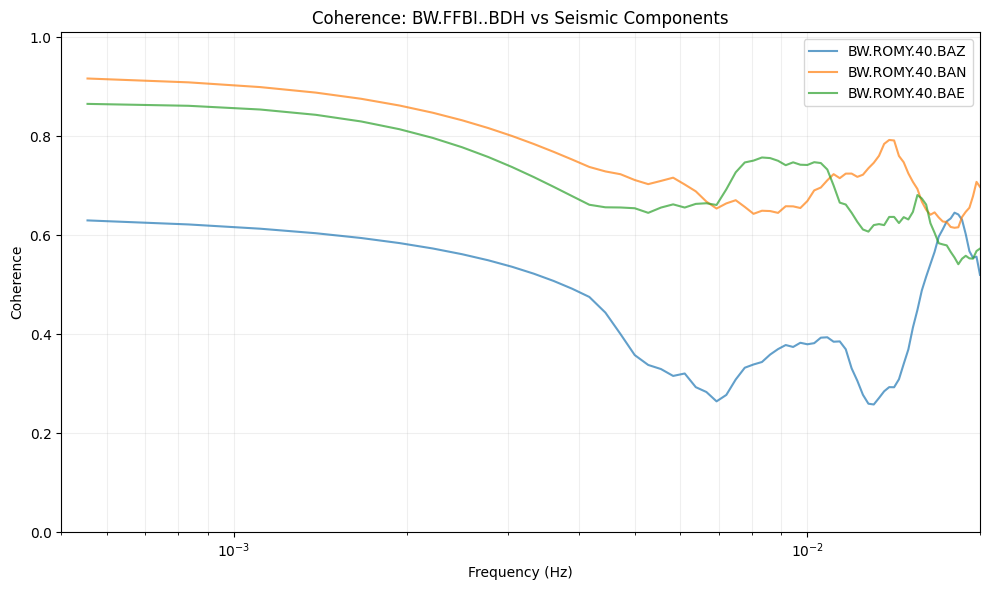

In [48]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BAZ", "BAN", "BAE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=fmin,
    fmax=fmax,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDH",
    channels=["BAZ", "BAN", "BAE"]
    
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=fmin,
    fmax=fmax,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


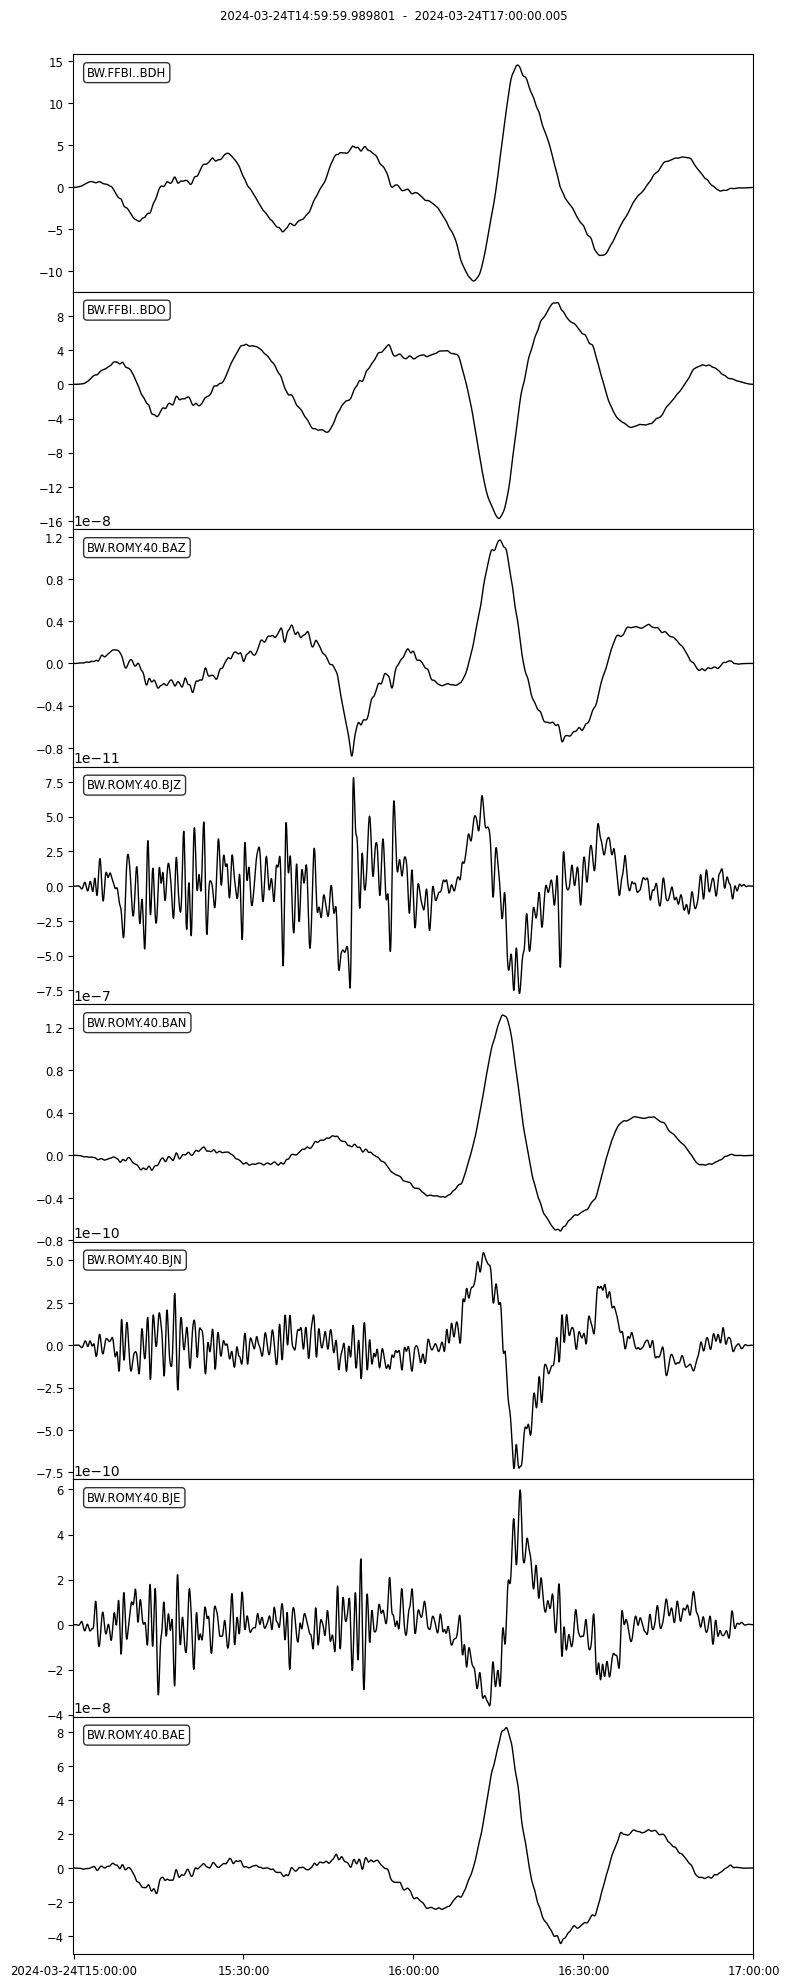

In [49]:
bs.st.plot(equal_scale=False);

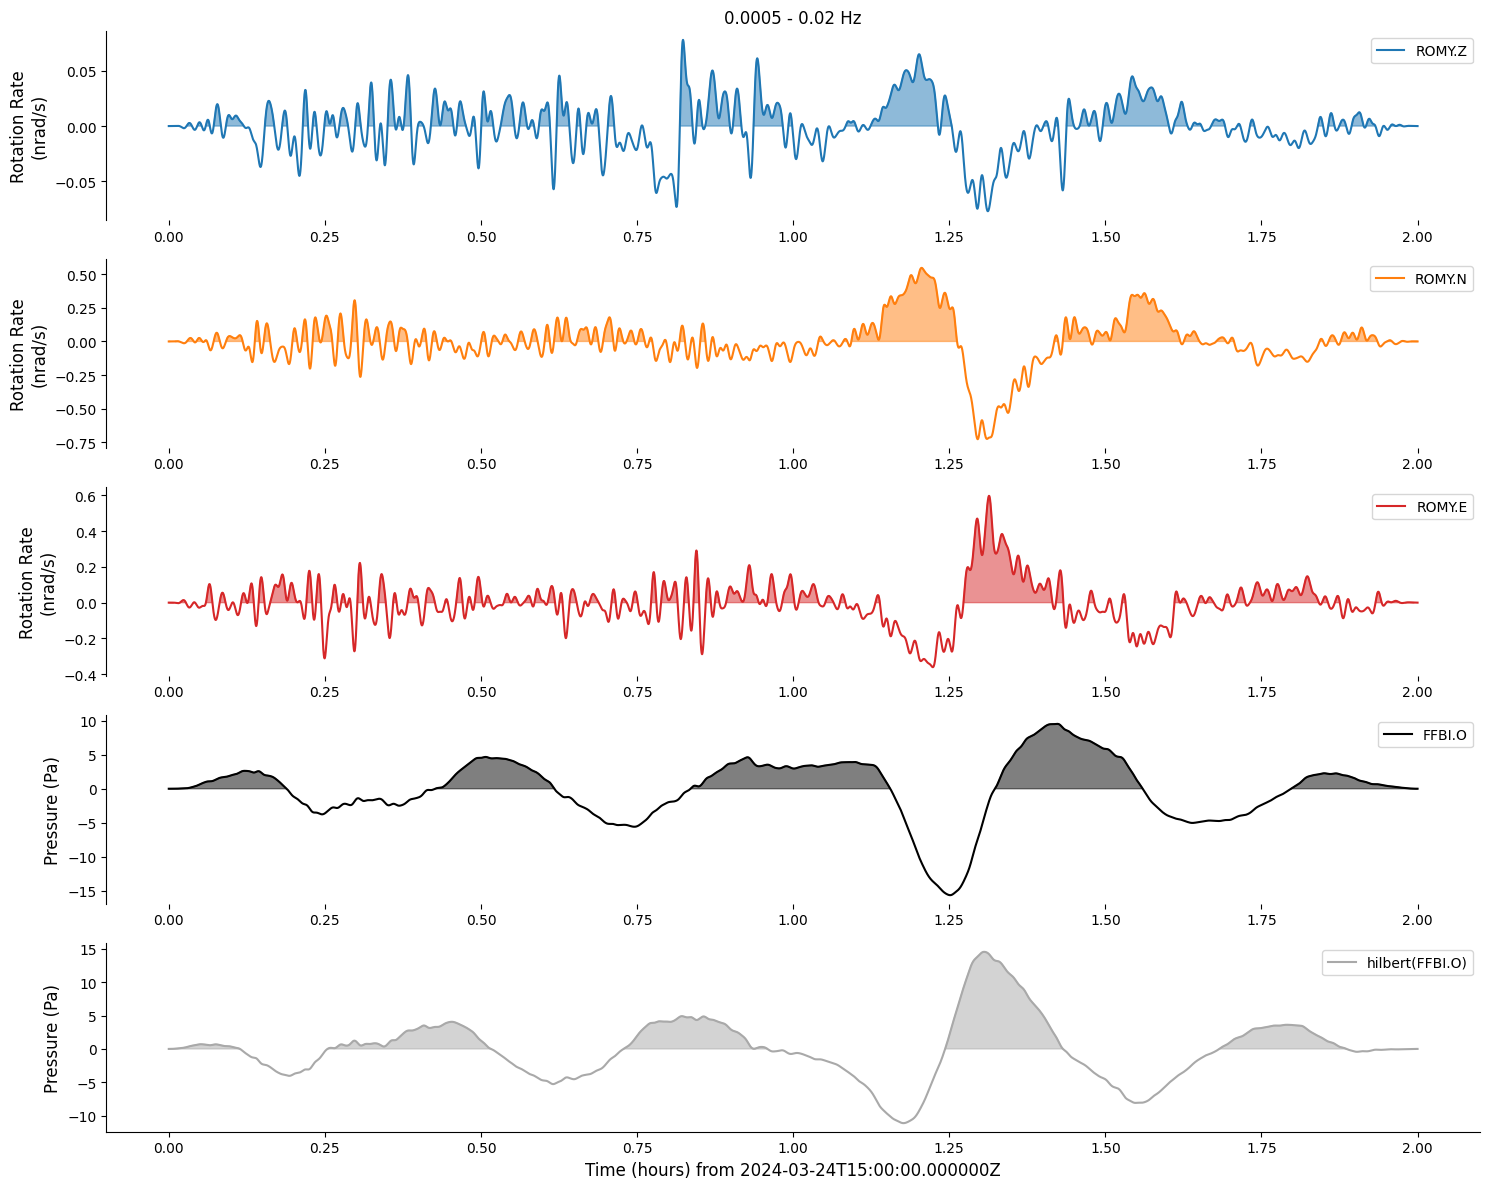

In [50]:
fig = bs.plot_waveforms(bs.st, time_unit="hours")

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_waveforms.png")

Make prediction for tilt


Component N:
P coefficient: -668.507 nrad/hPa
H coefficient: 187.603 nrad/hPa
Variance reduction: 88.1%

Component E:
P coefficient: -371.483 nrad/hPa
H coefficient: 143.477 nrad/hPa
Variance reduction: 79.4%

Component Z:
P coefficient: -56.497 nrad/hPa
H coefficient: -4.368 nrad/hPa
Variance reduction: 55.6%


/home/andbro/cursorfiles/baroseis/src/baroseis.py:2342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


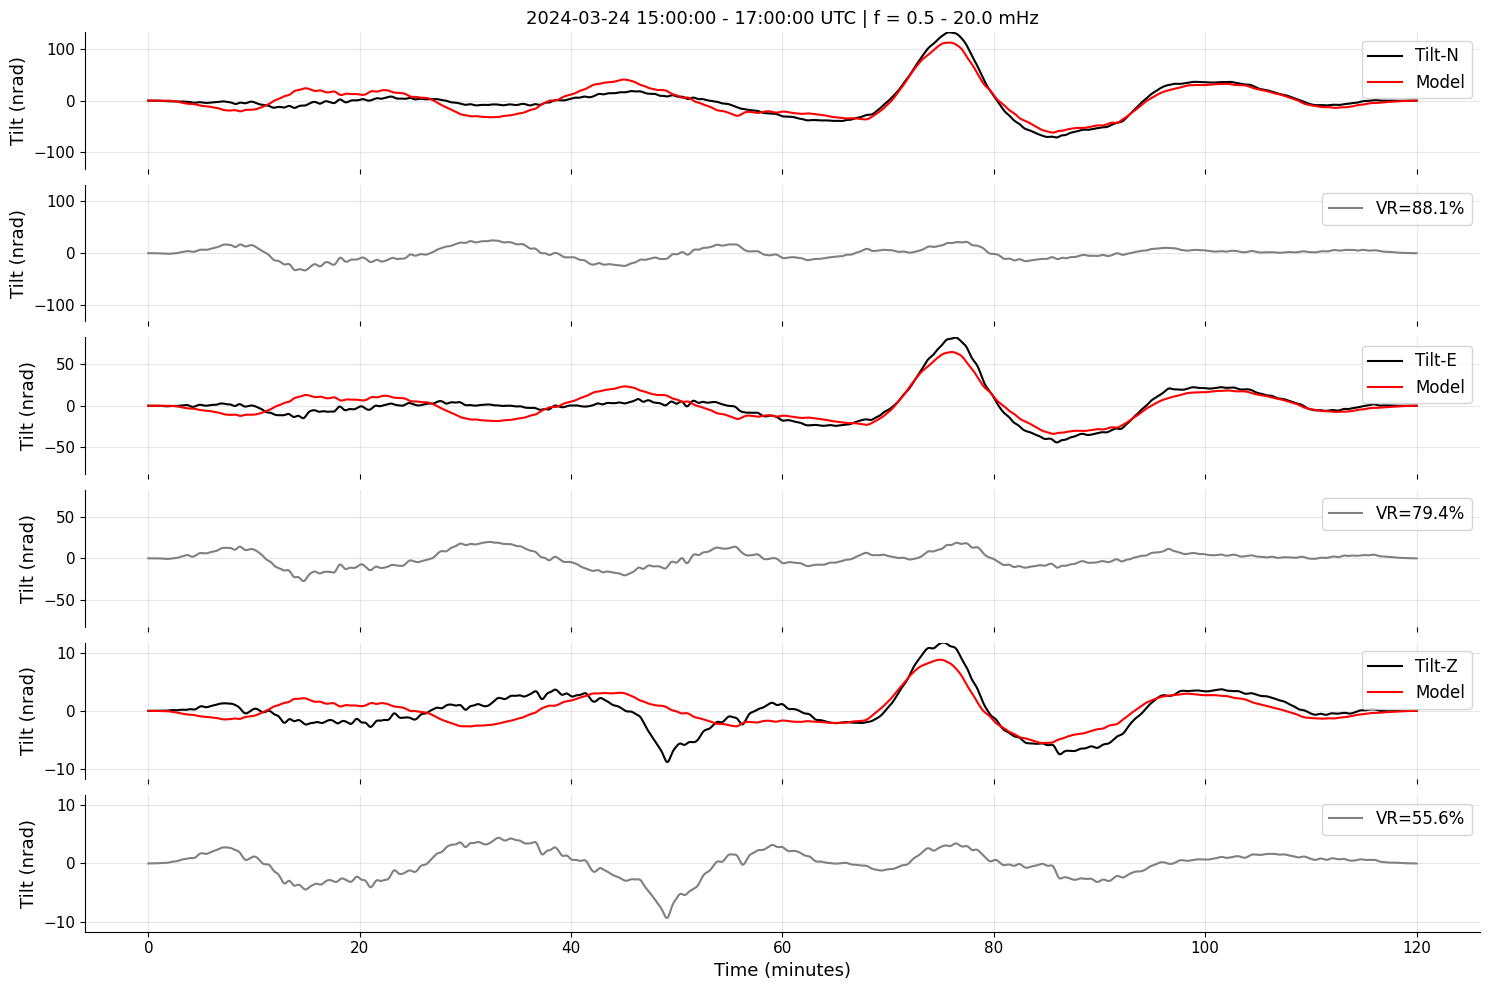

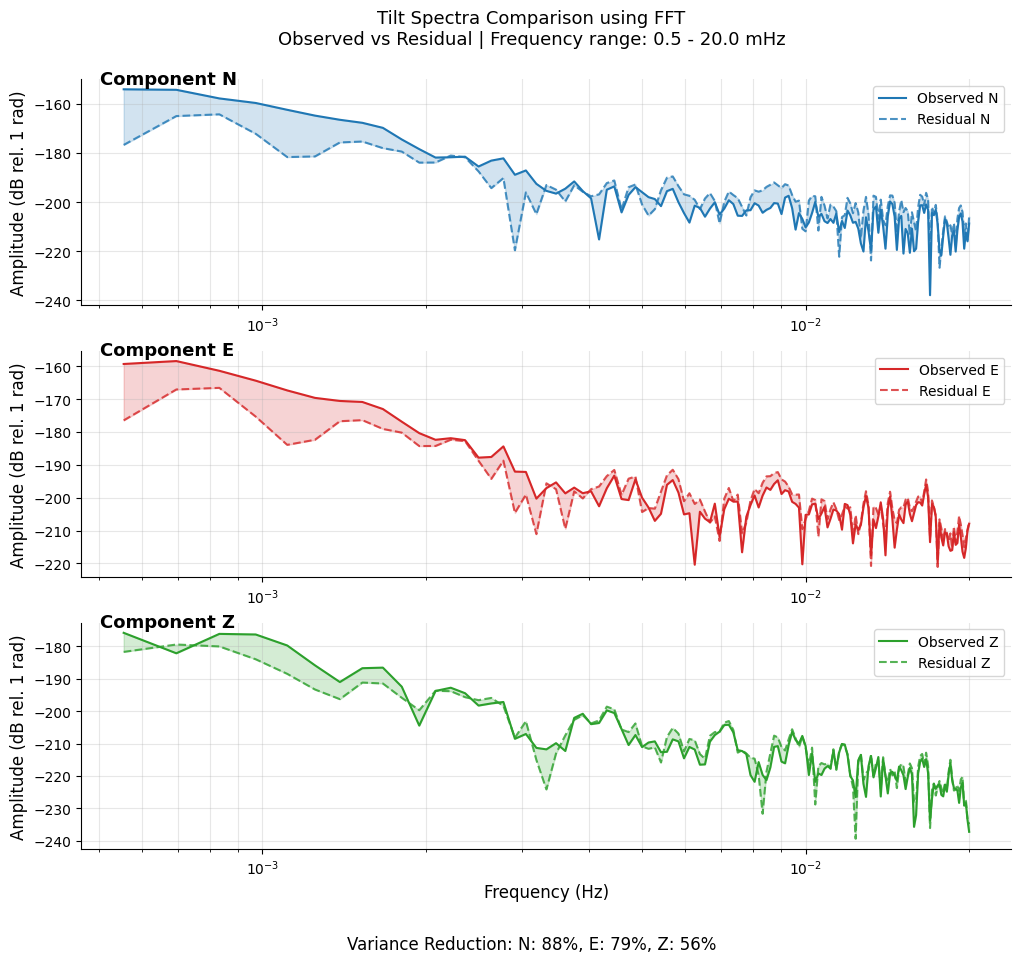

In [51]:
cha = "A"

bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_waveforms.png")

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_spectra.png")


Now we use the rotation rate data to fit it with a model based on the barometric data


Component N:
P coefficient: -0.892 nrad/s/hPa
H coefficient: -2.953 nrad/s/hPa
Variance reduction: 66.6%

Component E:
P coefficient: 0.711 nrad/s/hPa
H coefficient: 1.633 nrad/s/hPa
Variance reduction: 47.4%

Component Z:
P coefficient: 0.005 nrad/s/hPa
H coefficient: -0.256 nrad/s/hPa
Variance reduction: 27.6%


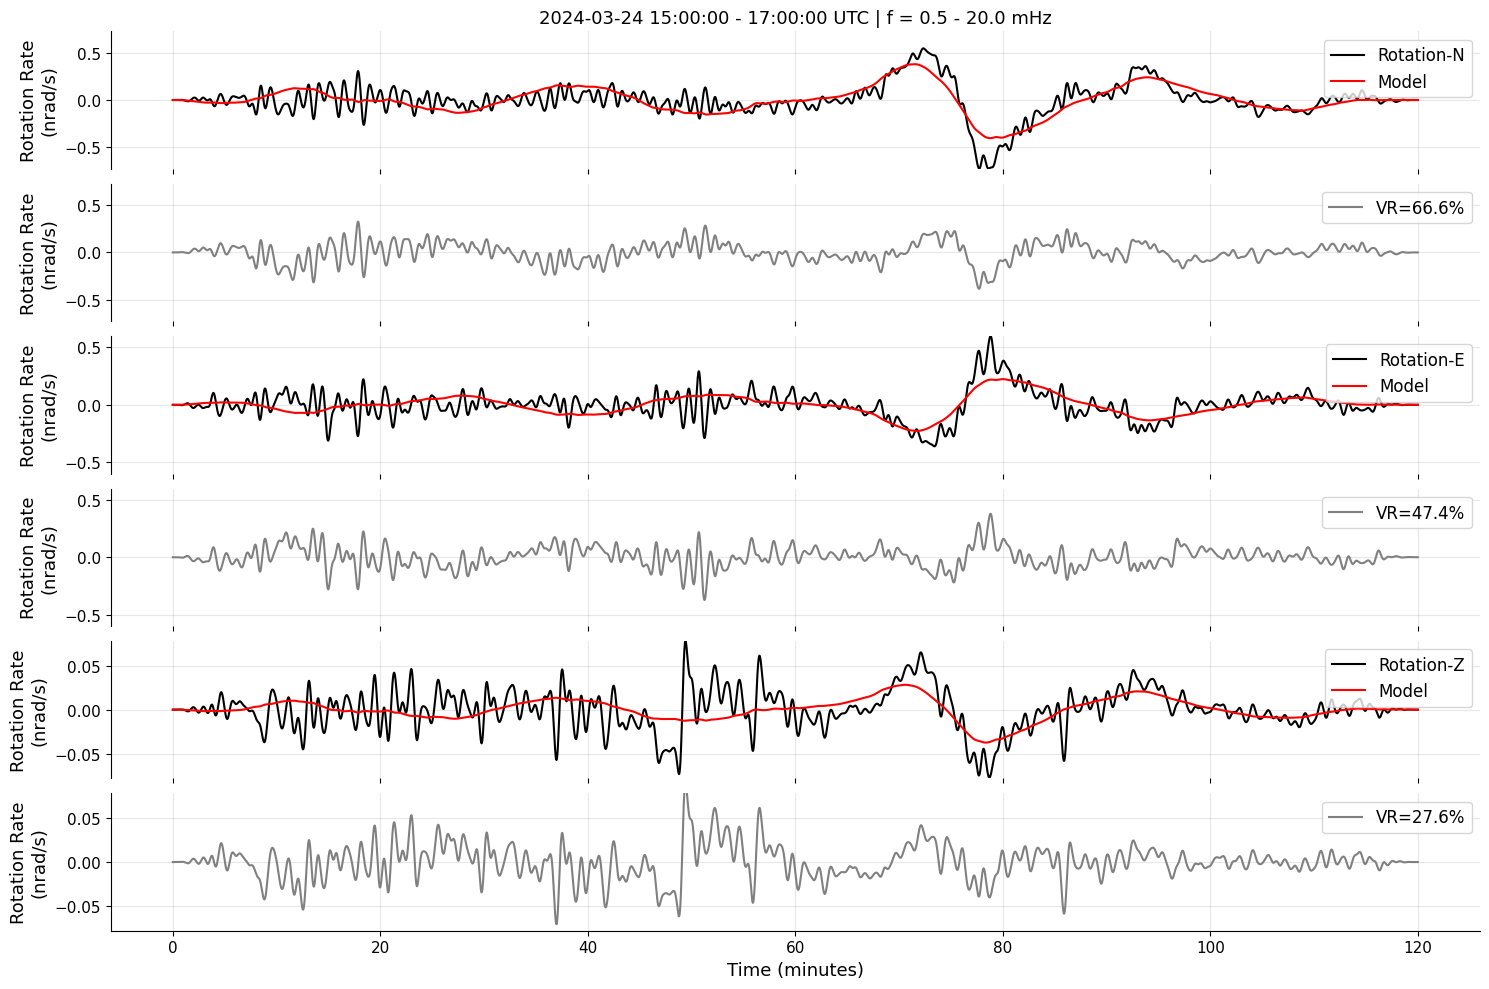

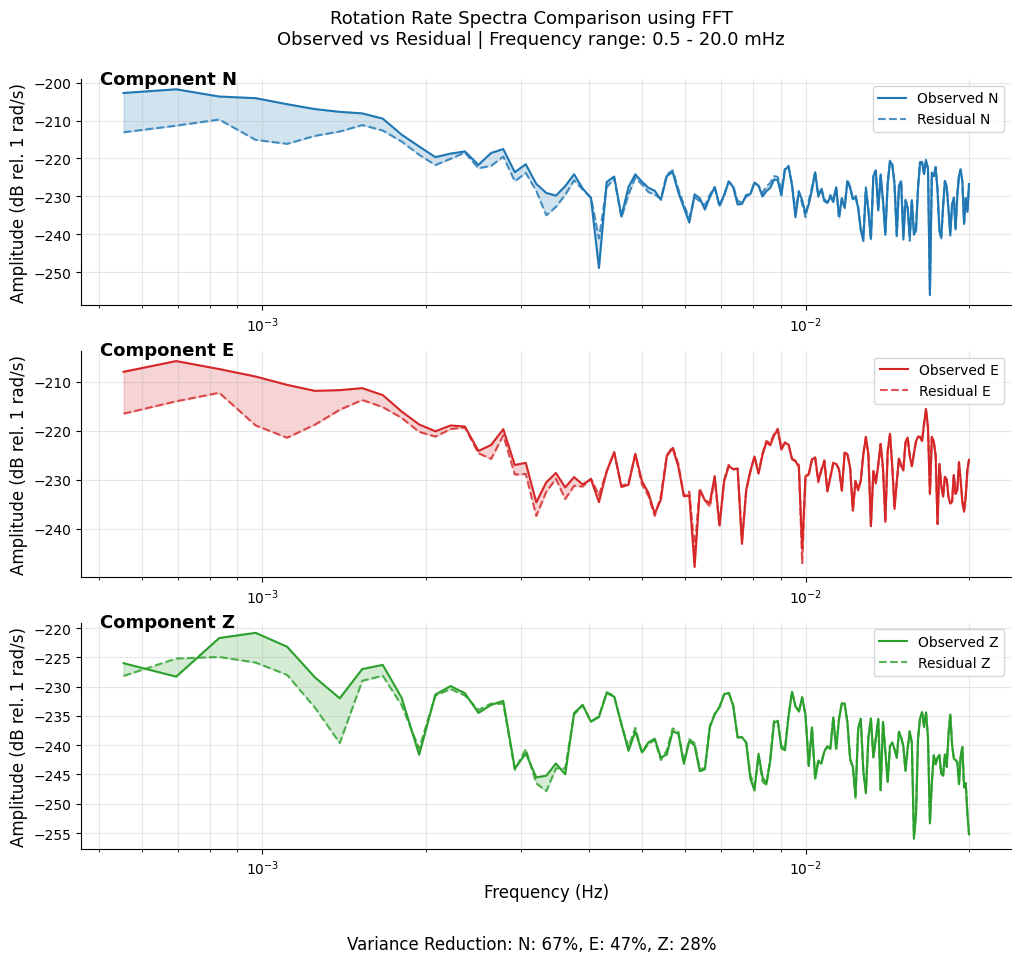

In [52]:
cha = "J"


bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_waveforms.png")

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True,
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_{cha}_residual_spectra.png")


### With Pressure Derivative

Now take the barometric derivatives and use them for modeling the rotation rate


Component N (with derivatives):
P coefficient: -728.789 nrad/hPa
H coefficient: 139.867 nrad/hPa
DP coefficient: 10573.748 nrad/hPa/s
DH coefficient: -13394.161 nrad/hPa/s
Variance reduction: 88.4%

Component E (with derivatives):
P coefficient: -412.752 nrad/hPa
H coefficient: 81.876 nrad/hPa
DP coefficient: 13637.308 nrad/hPa/s
DH coefficient: -9175.589 nrad/hPa/s
Variance reduction: 80.1%

Component Z (with derivatives):
P coefficient: -56.014 nrad/hPa
H coefficient: -18.192 nrad/hPa
DP coefficient: 3058.467 nrad/hPa/s
DH coefficient: 104.456 nrad/hPa/s
Variance reduction: 56.4%


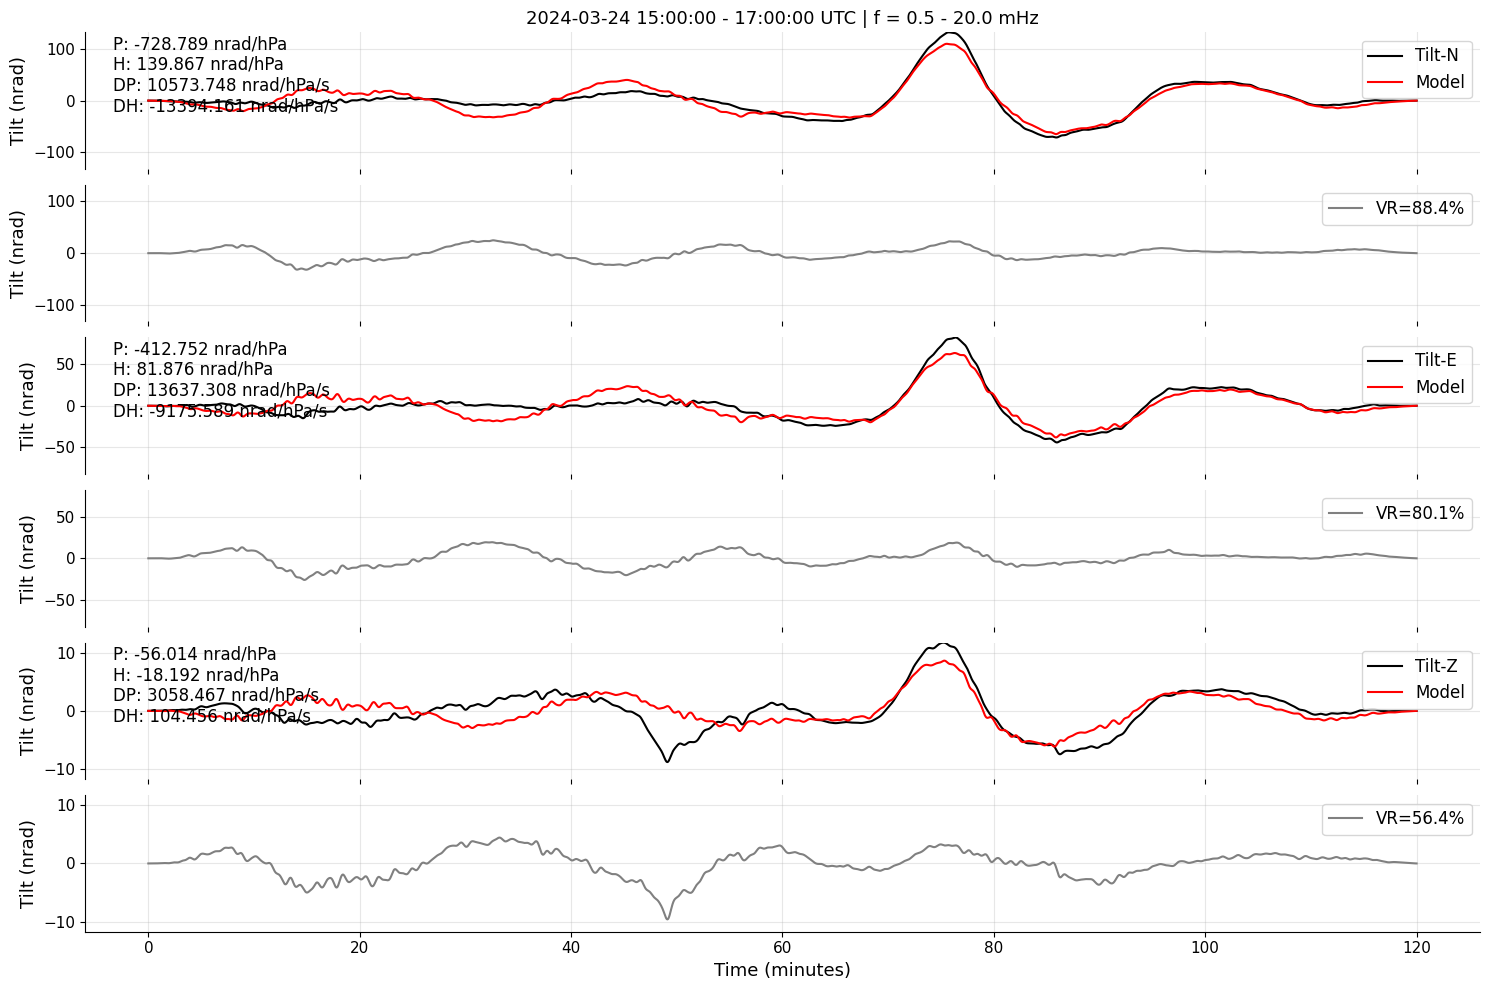

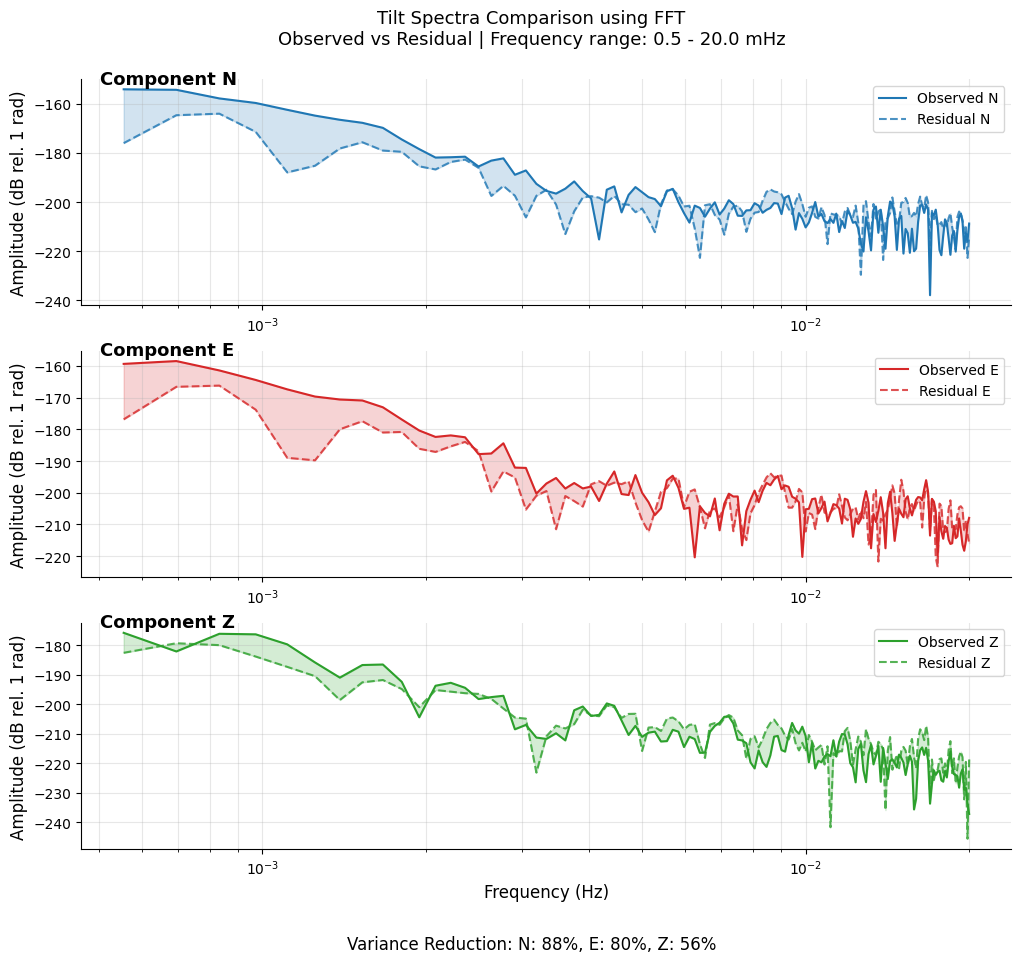

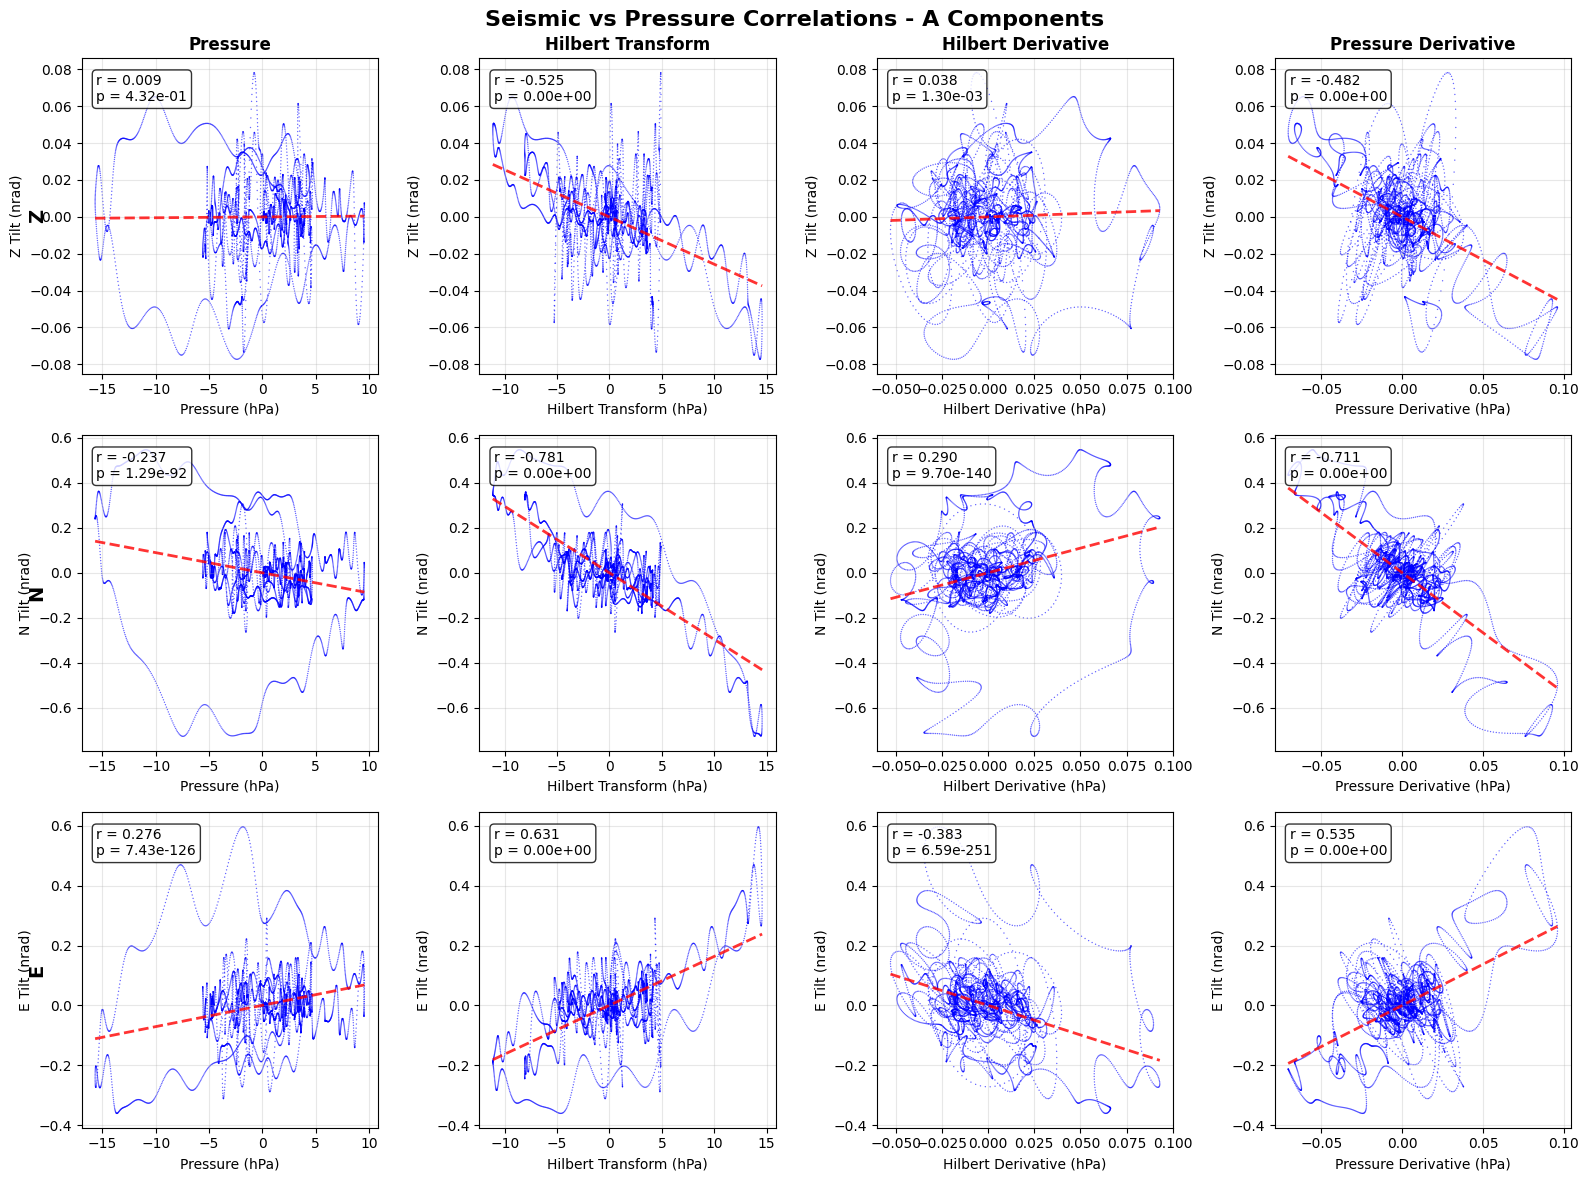

In [53]:
cha = "A"

bs.model_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,  # for rotation rate
    zero_intercept=True,
    verbose=True,
)

fig = bs.plot_residuals_derivatives(
    channel_type=cha,
    out=True
)

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True,
)

fig = bs.plot_scatter_correlations(channel_type=cha, out=True)


In [54]:
# _st = bs.st.copy()
# # plt.plot(_st.select(channel="BDO")[0].data)
# for tr in _st:
#     if tr.stats.channel[1] == "D":
#         print(tr.stats.channel)
#         tr = tr.differentiate()
#     if "PP" in tr.stats.location:
#         _st.remove(tr)

# # plt.plot(_st.select(channel="BDO")[0].data)
# bs.st = _st

In [55]:
# bs.predict_tilt_from_pressure(
#     method="least_squares",
#     channel_type="J",
#     zero_intercept=True
# )

# fig = bs.plot_residuals(
#     time_unit="minutes",
#     channel_type="J",
#     out=True
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_waveforms.png")

# fig = bs.compare_spectra(
#     method='fft',
#     channel_type='J',
#     fmin=0.0005,
#     fmax=0.01,
#     db_scale=True,
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_spectra.png")
